In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import sympy as spy
spy.init_printing()

In [2]:
I0, l, d, theta, a = spy.symbols(r"I_0 \lambda d \theta a", real = True, positive = True)

In [3]:
def I1(I0, d, l, theta, a):
    pi = spy.pi
    cos = spy.cos
    sin = spy.sin
        
    f1 = cos(pi/l*d*sin(theta))**2
    f2 = (sin(pi*a/l*sin(theta))/(pi*a/l*sin(theta)))**2
    return I0*f1*f2

def I2(I0, d, l, theta, a):
    pi = np.pi
    cos = np.cos
    sin = np.sin
    
    f1 = cos(pi/l*d*sin(theta))**2
    f2 = (sin(pi*a/l*sin(theta))/(pi*a/l*sin(theta)))**2
    return I0*f1*f2

In [4]:
exp = I1(I0, d, l, theta, a)

In [5]:
double_slit = np.genfromtxt("Doble_rendija.txt")
interferometer = np.genfromtxt("Fabry_Perot.txt")
stationary = np.genfromtxt("Onda_estacionaria.txt")
emisor = np.genfromtxt("Orientacion_emisor.txt")
polarizer = np.genfromtxt("Polarizador.txt")
polarizerx3 = np.genfromtxt("Polarizador_x3.txt")
polarizerx10 = np.genfromtxt("Polarizadores_x10.txt")
reflexion = np.genfromtxt("Reflexion.txt")

# Double slit

In [6]:
def fitI(theta, l, a):
    return I2(1, 6.5, l, theta, a)

L = 2.7 + 0.2
a = 2.2 + 0.4


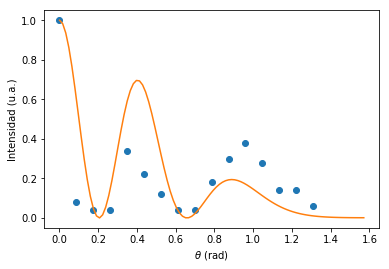

In [7]:
theta = np.deg2rad(double_slit[1:, 0])
intensity = double_slit[1:, 1]

plt.plot(theta, intensity, "o", label = "Experimental")

theta[0] = 0.1
popt, pcov = curve_fit(fitI, theta, intensity, bounds = [[1.0, 0.1], [4.0, 3.0]])

x = np.linspace(1e-3, np.pi/2, 100)
y = I2(1, 6.5, popt[0], x, popt[1])

print("L = %.1f + %.1f"%(popt[0], pcov[0, 0]**0.5))
print("a = %.1f + %.1f"%(popt[1], pcov[1, 1]**0.5))

plt.plot(x, y, label = "Teórico")

plt.xlabel(r"$\theta$ (rad)")
plt.ylabel("Intensidad (u.a.)")

plt.savefig("DobleRendija.pdf")
plt.show()

# Distancia

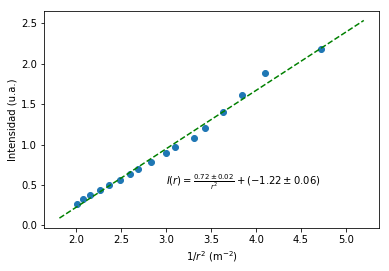

In [8]:
x = stationary[1:, 0]/100
y = np.prod(stationary[1:, 1:], axis = 1)

x = 1/x**2
plt.plot(x, y, "o")

(m, b), cov = np.polyfit(x, y, 1, cov = True)
x = np.linspace(0.9*x.min(), x.max()*1.1)
y = m*x + b

plt.plot(x, y, "--", c = "g")
plt.text(3.0, 0.5, r"$I(r) = \frac{%.2f \pm %.2f}{r^2} + (%.2f \pm %.2f)$"%(m, cov[0, 0]**0.5, b, cov[1, 1]**0.5))

plt.xlabel("$1/r^2$ (m$^{-2}$)")
plt.ylabel("Intensidad (u.a.)")
plt.savefig("Distancia.pdf")
plt.show()